In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [2]:
# load train dataset (todo dataset tem 1309 observações)
df_train = pd.read_csv('datasets/train_titanic.csv')

#### Exibindo os tipos de features, quantidades de observações e features

In [3]:
print(df_train.info())
print(df_train.shape)
#df_train['Cabin']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
(891, 12)


In [4]:
df_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

#### Quantos sobreviveram no conjunto de treino

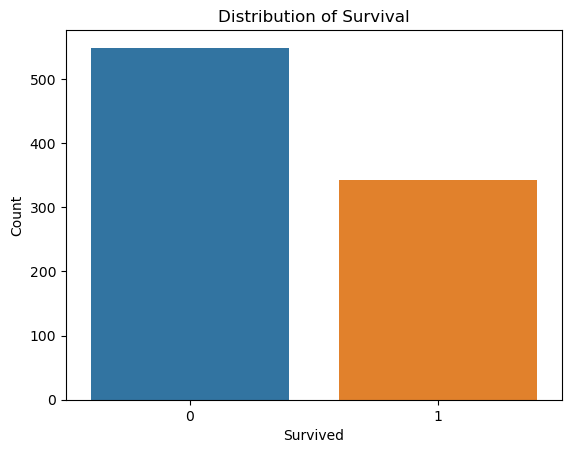

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
## categorical attributes
sns.countplot(data=df_train, x='Survived')
#A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.

# Add labels and title
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Distribution of Survival')

# Show the plot
plt.show()

#### Tarefa 1) Acrescente abaixo células para gerar gráfico de frequência de algumas variáveis categóricas similar ao gráfico acima, para as features PClass, Sibsp, Parch, Embarked (local de embarque). Atenção, as features PClass, Sibsp e Parch, embora numericas (inteiras) são variáveis de contagem com valores discretos podendo ser associado à classes, por isto é chamada categórica aqui

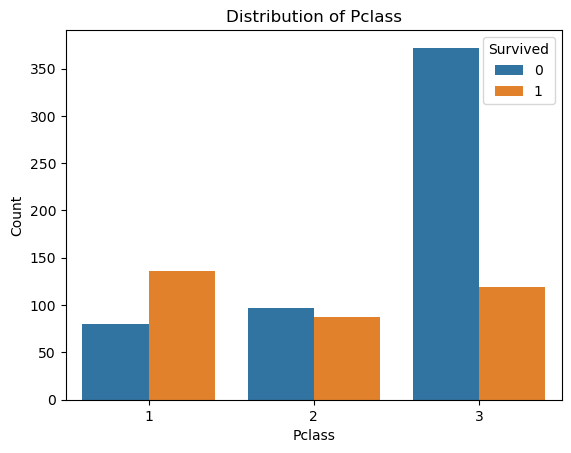

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
## categorical attributes
sns.countplot(data=df_train, x='Pclass', hue='Survived')

# Add labels and title
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Distribution of Pclass')

# Show the plot
plt.show()

##### Ou seja, haviam mais pessoas na terceira classe e depois na primeira classe.

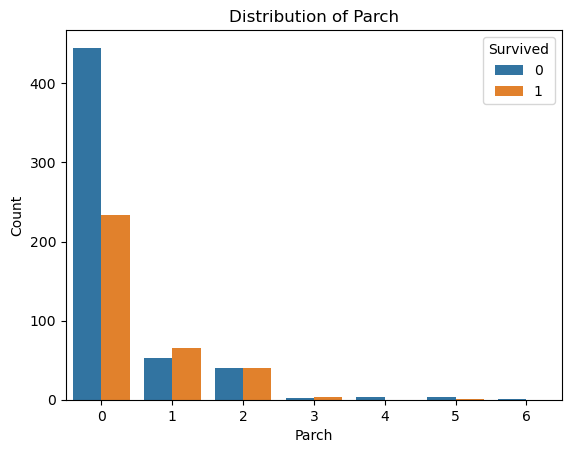

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
## categorical attributes
sns.countplot(data=df_train, x='Parch', hue='Survived')

# Add labels and title
plt.xlabel('Parch')
plt.ylabel('Count')
plt.title('Distribution of Parch')

# Show the plot
plt.show()

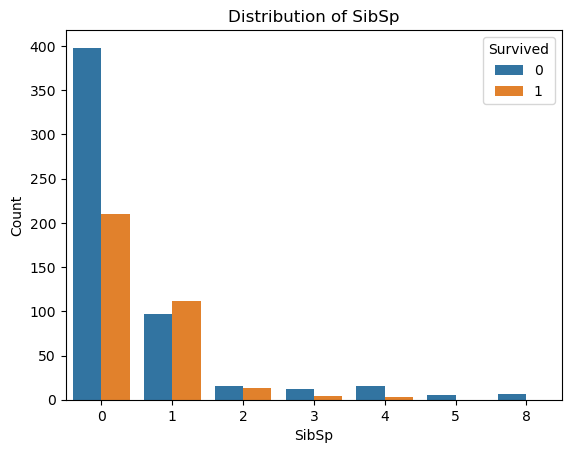

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
## categorical attributes
sns.countplot(data=df_train, x='SibSp', hue='Survived')

# Add labels and title
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.title('Distribution of SibSp')

# Show the plot
plt.show()

##### Como a presença de parentescos/conhecimento entre as pessoas é similar na faixa 0-2 entre SibSp e Parch, poderia-se pensar em Feature Extraction criando uma nova coluna com a soma das duas colunas SibSp e Parch

#### Verificando no conjunto de treino a distribuição entre homens e mulheres que sobreviveram

In [9]:
women = df_train.loc[df_train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

men = df_train.loc[df_train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print(f'{sum(women)} Mulheres sobreviventes de {len(women)}: {rate_women}')
print(f'{sum(men)} Homens sobreviventes de {len(men)}: {rate_men}')

233 Mulheres sobreviventes de 314: 0.7420382165605095
109 Homens sobreviventes de 577: 0.18890814558058924


#### Criando uma tabela PIVÔ para verificar a média dos dados numéricos em relação à sobrevivência

In [10]:
pd.pivot_table(df_train, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

Age       Fare     Parch     SibSp
Survived                                          
0         30.626179  22.117887  0.329690  0.553734
1         28.343690  48.395408  0.464912  0.473684

##### Não há diferença significativa entre as idades médias de sobreviventes e não sobreviventes, contudo pode-se observar se em cada Pclass a concentração de idades e tentar categorizar e também a distribuição de idades de sobreviventes por sexo

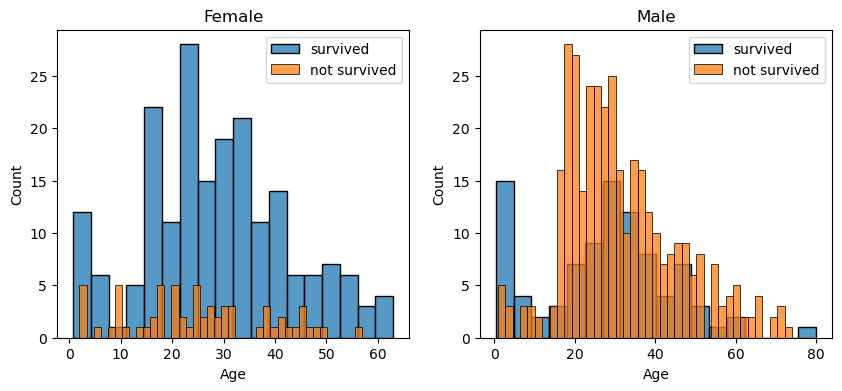

In [11]:
import matplotlib.pyplot as plt
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

women = df_train.loc[df_train.Sex == 'female']
men = df_train.loc[df_train.Sex == 'male']

ax = sns.histplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.histplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.histplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.histplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

##### Homens entre 18-30 maiores chances, mulheres um pouco menos 14-40 mais chances. Homens entre 5-18 poucas chances de sobrevivência, o que não é verdade para mulheres. Em ambos os casos bebês tem altas chances

#### Quais são suas análises a partir da tabela acima?

#### Verificando a DISTRIBUIÇÃO de idades no conjunto de treino. Verificamos que é uma distribuição quase NORMAL

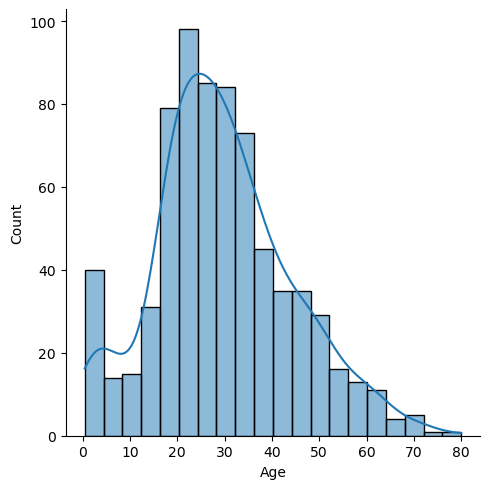

In [12]:
sns.displot(df_train['Age'], kde='True')

##### Já a coluna Fare (tarifa) não possui aspecto de dist normal. É natural pois a maioria está na terceira classe com tarifas mais baixas. Na transformação de dados o ideal é manter a distribuição original dos dados. Se necessário, usar padronização minmax, para trazer a escala para a mesma das idades e das demais colunas

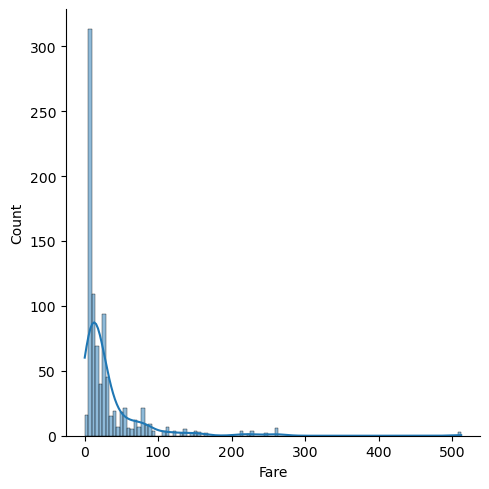

In [13]:
sns.displot(df_train['Fare'], kde='True')

##### Vamos verificar a relação de idades de acordo com as classes no navio entre sobreviventes e não sobreviventes. Vamos ver isto de duas formas, com um barplot e com algo mais próximo a um histograma

<Axes: xlabel='Survived', ylabel='Age'>

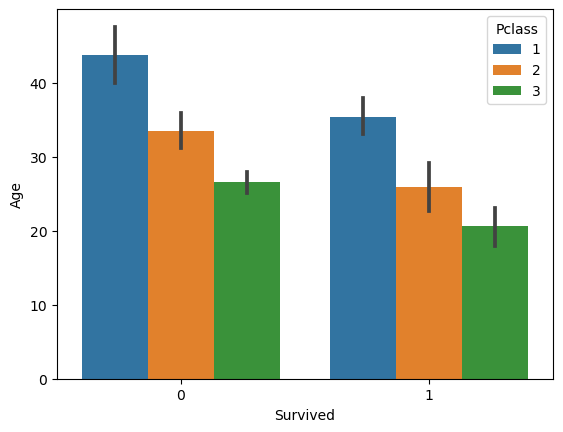

In [14]:
sns.barplot(data=df_train, x='Survived', y='Age', hue='Pclass')

#### Este gráfico pode estar incorreto, pois precisamos ver se há dados faltantes de idade. Caso haja, podemos estabelecer algum critério de preenchimento, como a média das idades

In [15]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
# Preencher com a idade média
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())

<Axes: xlabel='Survived', ylabel='Age'>

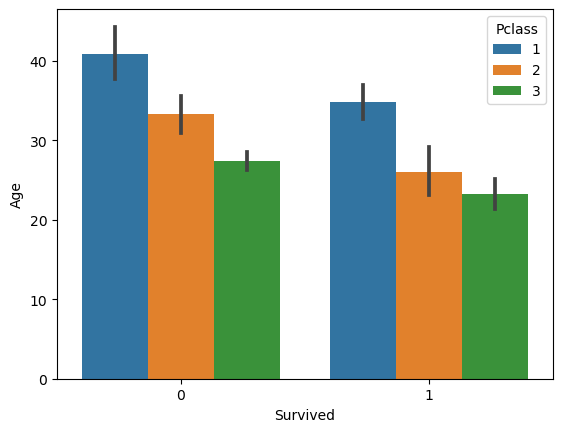

In [17]:
sns.barplot(data=df_train, x='Survived', y='Age', hue='Pclass')

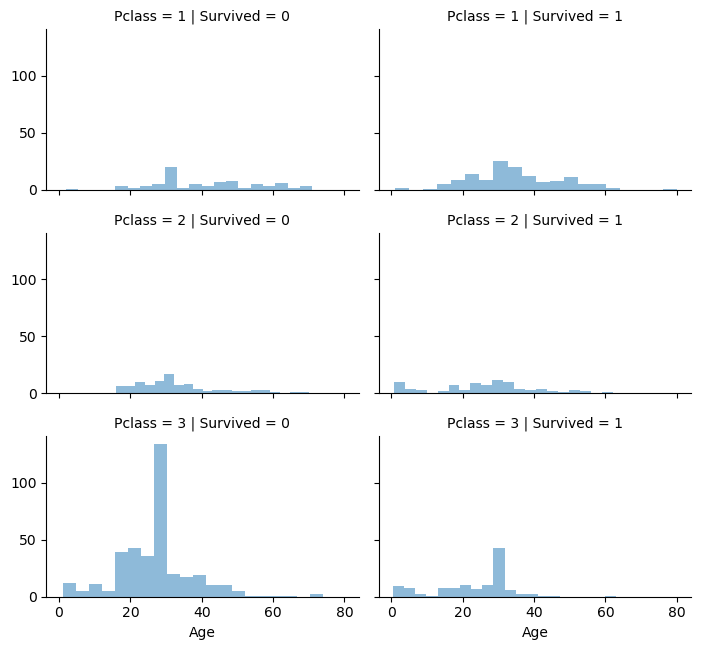

In [18]:
grid = sns.FacetGrid(df_train, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

#### Vamos criar um gráfico de barras para entender a distribuição de sobreviventes e não sobreviventes de acordo com a classe e o valor da taxa média

<Axes: xlabel='Survived', ylabel='Fare'>

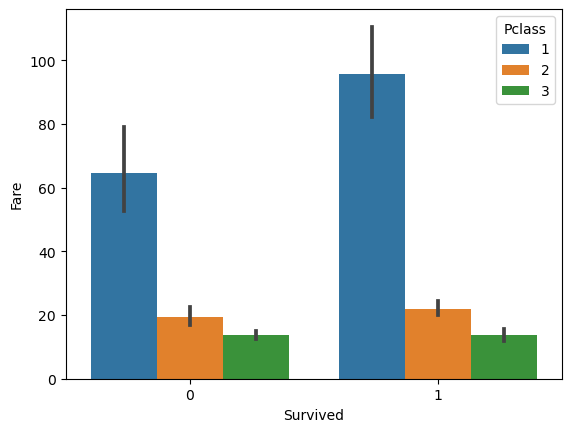

In [19]:
sns.barplot(data=df_train, x='Survived', y='Fare', hue='Pclass')

#### Será que a idade é uma boa feature decisória? E o valor da passagem? Vamos procurar identificar as correlações de Pearson das features numéricas com a variável target

In [20]:
df_train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ...        ...   
886                              Montvila, Rev. Juozas    male  27.000000   
887                       Graham, Miss. Margaret Edith  female  19.000000   
888           Johnston, Miss. Catherine Helen "Carrie"  female  29.699118   
889                              Behr, Mr. Karl Howell    male  26.000000   
890                                Dooley, Mr. Patrick    male  32.000000   

     SibSp  Parch            Ticket     Fare Cabin Embarked  
0        1      0         A/5 21171   7.2500   NaN        S  
1        1      0          PC 17599  71.2833   C85        C  
2        0      0  STON/O2. 3101282   7.9250   NaN        S  
3        1      0            113803  53.1000  C123        S  
4        0      0            373450   8.0500   NaN        S  
..     ...    ...               ...      ...   ...      ...  
886      0      0            211536  13.0000   NaN        S  
887      0      0            112053  30.0000   B42        S  
888      1      2        W./C. 6607  23.4500   NaN        S  
889      0      0            111369  30.0000  C148        C  
890      0      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

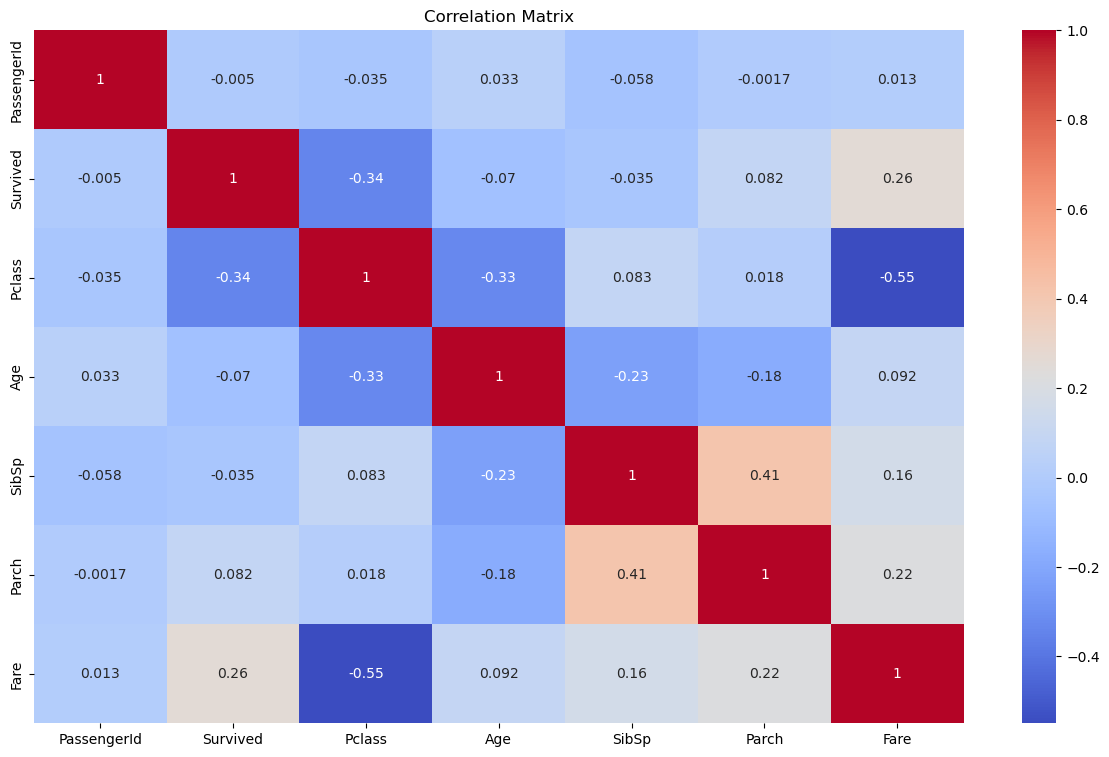

In [21]:
# Calculate correlation matrix for numeric columns only
df_corr = df_train.copy()
df_corr = df_corr.drop(columns={'Name','Sex','Ticket','Cabin','Embarked'})
corr = df_corr.corr(method='pearson', min_periods=1)

# Plot the correlation matrix
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Add title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

#### Escolha 1) classe, sexo, número de parentes sanguíneos e não sanguíneos

In [22]:
df_test = pd.read_csv('datasets/test_titanic.csv')
features_1 = ["Pclass", "Sex", "SibSp", "Parch"] # exemplo de subconjunto de features
# pclass	Ticket class	1 = 1st (upper), 2 = 2nd (middle), 3 = 3rd (lower)
# sibsp: # of siblings The dataset defines family relations in this way... 
# Sibling = brother, sister, stepbrother, stepsister (irmão, irmã, meio-irmão, meio-irmã)
#Spouse = husband, wife (mistresses and fiancés were ignored) (marido, esposa)
# parch: # of parents / children aboard the Titanic (pai, mãe, filha, filho, enteada, enteado). Crianças viajando com babás não foram consideradas aqui	                                                             


##### Unindo SibSp e Parch nos datasets de treino e teste, na coluna RELATIVES (parentes) e acrescentando uma coluna binária not_alone para indicar se viaja sozinho

In [23]:
data = [df_train, df_test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
df_train['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

##### Conferindo a quantidade de parentes total com a sobrevivência. Vemos que de 1 a 3 tem maior probabilidade de sobreviver. Menor que 1 e acima de 4 menor (exceção para 6)

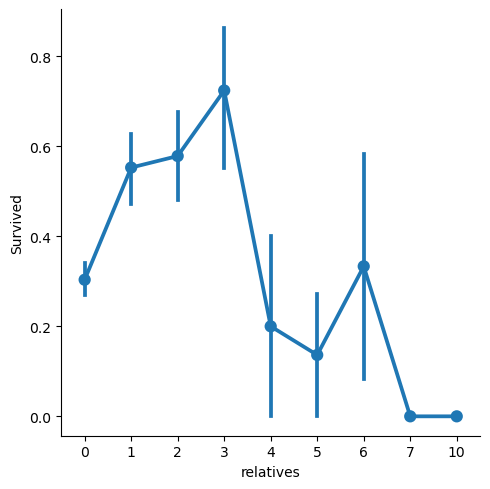

In [24]:
sns.catplot(data=df_train, x='relatives',y='Survived', kind="point")


In [25]:
df_train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ...        ...   
886                              Montvila, Rev. Juozas    male  27.000000   
887                       Graham, Miss. Margaret Edith  female  19.000000   
888           Johnston, Miss. Catherine Helen "Carrie"  female  29.699118   
889                              Behr, Mr. Karl Howell    male  26.000000   
890                                Dooley, Mr. Patrick    male  32.000000   

     SibSp  Parch            Ticket     Fare Cabin Embarked  relatives  \
0        1      0         A/5 21171   7.2500   NaN        S          1   
1        1      0          PC 17599  71.2833   C85        C          1   
2        0      0  STON/O2. 3101282   7.9250   NaN        S          0   
3        1      0            113803  53.1000  C123        S          1   
4        0      0            373450   8.0500   NaN        S          0   
..     ...    ...               ...      ...   ...      ...        ...   
886      0      0            211536  13.0000   NaN        S          0   
887      0      0            112053  30.0000   B42        S          0   
888      1      2        W./C. 6607  23.4500   NaN        S          3   
889      0      0            111369  30.0000  C148        C          0   
890      0      0            370376   7.7500   NaN        Q          0   

     not_alone  
0            0  
1            0  
2            1  
3            0  
4            1  
..         ...  
886          1  
887          1  
888          0  
889          1  
890          1  

[891 rows x 14 columns]

#### Removendo a identificação da cabine (Cabin), o Ticket, o nome da pessoa (Name) e a coluna binária target (Survived) do dataset de treino. A serie target é a coluna Survived

In [26]:
data, target = df_train.drop(columns = {'Survived','Name', 'Cabin', 'Ticket'}), df_train['Survived']

In [27]:
features_1 = ["Pclass", "Sex", "relatives", "not_alone"] # exemplo de subconjunto de features após feature extraction e feature creation

#### Necessário encoder da feature Sex

In [28]:
X = pd.get_dummies(data[features_1]) #similar to one_hot_encoding (return a df)
X

Pclass  relatives  not_alone  Sex_female  Sex_male
0         3          1          0           0         1
1         1          1          0           1         0
2         3          0          1           1         0
3         1          1          0           1         0
4         3          0          1           0         1
..      ...        ...        ...         ...       ...
886       2          0          1           0         1
887       1          0          1           1         0
888       3          3          0           1         0
889       1          0          1           0         1
890       3          0          1           0         1

[891 rows x 5 columns]

#### Vamos testar estas features com o KNN

#### Vamos criar uma função que recebe o modelo/algoritmo, separa o conjunto de treino em treino limitado/validação e obtém a acurácia de validação e depois roda a validação cruzada e obtém a acurácia média e o desvio padrão. O objetivo é verificar se as duas métricas são semelhantes (com dados novos da CV), para diferentes modelos ML de classificação

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
def classify(model, feature_vector):
    X_train, X_test, y_train, y_test = train_test_split(feature_vector, target, test_size=0.3, random_state=42)
    model.fit(X_train, y_train)
    print("Accuracy full validation set: %0.2f" % model.score(X_test, y_test))
    
    score = cross_val_score(model, feature_vector, target, cv=10, scoring='accuracy')
    print("Mean Accuracy CV: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

In [30]:
# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
classify(knn_model, X)

Accuracy full validation set: 0.77
Mean Accuracy CV: 0.80 (+/- 0.05)


#### Tarefa 2) Repetir a célula acima para os algoritmos classificadores do sklearn Regressão Logística (LogisticRegression), Árvore de Decisão (DecisionTree), Floresta Aleatória (RandomFlorest), ExtraTreeClassifier, XGBClassifier, CatBoostClassifier. Considerar em cada caso os hiperparâmetros default. Por exemplo, no caso acima poderia ser apenas KNeighborsClassifier(). Escolha o modelo final para predição no conjunto de teste com a menor diferença dos resultados acima

In [31]:
from sklearn.linear_model import LogisticRegression
# LR
lr_model = LogisticRegression()
classify(lr_model, X)

Accuracy full validation set: 0.81
Mean Accuracy CV: 0.79 (+/- 0.04)


In [32]:
from sklearn.tree import DecisionTreeClassifier
# DT
tree_model = DecisionTreeClassifier()
classify(tree_model, X)

Accuracy full validation set: 0.80
Mean Accuracy CV: 0.79 (+/- 0.07)


In [33]:
from sklearn.ensemble import RandomForestClassifier
#RF
rf_model = RandomForestClassifier()
classify(rf_model, X)

Accuracy full validation set: 0.80
Mean Accuracy CV: 0.79 (+/- 0.06)


In [34]:
from sklearn.tree import ExtraTreeClassifier
#ET
et_model = ExtraTreeClassifier()
classify(et_model, X)

Accuracy full validation set: 0.81
Mean Accuracy CV: 0.79 (+/- 0.07)


In [35]:
from sklearn.ensemble import GradientBoostingClassifier
#GB
gb_model = GradientBoostingClassifier()
classify(gb_model, X)

Accuracy full validation set: 0.81
Mean Accuracy CV: 0.80 (+/- 0.07)


In [36]:
from xgboost import XGBClassifier
#XGB
xgb_model = XGBClassifier()
classify(xgb_model,X)

Accuracy full validation set: 0.80
Mean Accuracy CV: 0.79 (+/- 0.06)


In [37]:
!pip install catboost

In [56]:
from catboost import CatBoostClassifier

#CB
cb_model = CatBoostClassifier(num_trees=50)
classify(cb_model,X)

Learning rate set to 0.131288
0:	learn: 0.6462819	total: 1.23ms	remaining: 60.3ms
1:	learn: 0.6091516	total: 2.12ms	remaining: 50.9ms
2:	learn: 0.5799263	total: 3.35ms	remaining: 52.5ms
3:	learn: 0.5559615	total: 4.34ms	remaining: 49.9ms
4:	learn: 0.5386977	total: 4.8ms	remaining: 43.2ms
5:	learn: 0.5213409	total: 5.35ms	remaining: 39.2ms
6:	learn: 0.5081554	total: 5.83ms	remaining: 35.8ms
7:	learn: 0.5001231	total: 6.17ms	remaining: 32.4ms
8:	learn: 0.4938103	total: 7.12ms	remaining: 32.4ms
9:	learn: 0.4848069	total: 8.03ms	remaining: 32.1ms
10:	learn: 0.4807664	total: 8.7ms	remaining: 30.8ms
11:	learn: 0.4747612	total: 10.4ms	remaining: 32.8ms
12:	learn: 0.4689083	total: 10.9ms	remaining: 31ms
13:	learn: 0.4646142	total: 11.4ms	remaining: 29.3ms
14:	learn: 0.4629050	total: 11.7ms	remaining: 27.4ms
15:	learn: 0.4579667	total: 12.3ms	remaining: 26.1ms
16:	learn: 0.4555712	total: 12.7ms	remaining: 24.6ms
17:	learn: 0.4518435	total: 13.3ms	remaining: 23.6ms
18:	learn: 0.4495473	total: 14

In [50]:
cb_model.get_feature_importance()

array([28.57748216, 16.45570846,  1.62315521, 28.08578755, 25.25786663])

In [39]:
from sklearn.naive_bayes import GaussianNB

#CB
nb_model = GaussianNB()
classify(nb_model,X)

Accuracy full validation set: 0.80
Mean Accuracy CV: 0.79 (+/- 0.05)


In [40]:
X_test = pd.get_dummies(df_test[features_1])

#Exemplo, se fosse o KNN o melhor acima:
knn_model.fit(X,target)
y_pred = knn_model.predict(X_test)

# salvar para upload em competições como Kaggle em que o conjunto de teste não possui coluna target
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': y_pred})
output.to_csv('mypredictions.csv', index=False)
print("Submissão salva!")
# https://www.kaggle.com/code/alexisbcook/titanic-tutorial

Submissão salva!


In [41]:

df_full = pd.read_csv('datasets/gender_submission.csv') 
#df_full.head()
target_test = df_full['Survived']
target_test



0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [42]:
from sklearn.metrics import classification_report
print(classification_report(target_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       266
           1       0.88      0.91      0.90       152

    accuracy                           0.92       418
   macro avg       0.91      0.92      0.92       418
weighted avg       0.92      0.92      0.92       418



##### macro avg é a média aritmética daquela métrica para todas as classes. weighted avg é a média ponderada daquela métrica considerando os suportes (quantidade de amostras por classe),ou seja quanto mais amostras, maior o peso

In [43]:
knn_report = pd.DataFrame(classification_report(y_true = target_test, y_pred = y_pred, output_dict=True)).transpose()
knn_report.to_csv('knn_testset_report.csv', index= True)

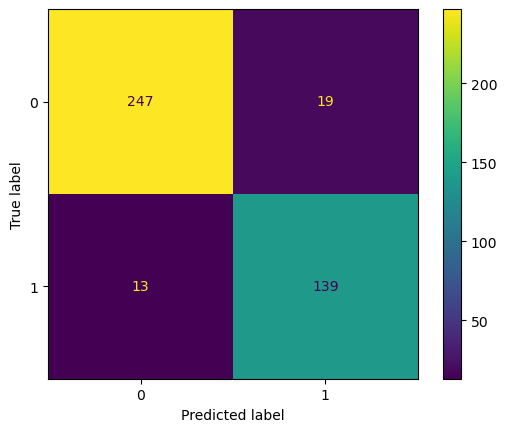

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(target_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=knn_model.classes_)
disp.plot()

##### Vamos incluir a idade e a tarifa tal como estão como features

In [45]:
features_2 = ["Pclass", "Sex", "relatives", "not_alone", "Age", "Fare"] # exemplo de subconjunto de features após feature extraction e feature creation
X_2 = pd.get_dummies(data[features_2]) #similar to one_hot_encoding (return a df)

In [46]:
# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
classify(knn_model, X_2)

Accuracy full validation set: 0.70
Mean Accuracy CV: 0.73 (+/- 0.07)


##### Aplicando MinMaxScaler em todas as features_2

In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(X_2)

In [48]:
# KNN
knn_model_2 = KNeighborsClassifier(n_neighbors=5)
classify(knn_model_2, data_scaled)

Accuracy full validation set: 0.80
Mean Accuracy CV: 0.82 (+/- 0.11)


In [94]:
from catboost import CatBoostClassifier

#CB
cb_model_2 = CatBoostClassifier(depth=6, l2_leaf_reg=5, learning_rate=0.1, num_trees=50)
classify(cb_model_2, data_scaled)

0:	learn: 0.6577856	total: 4.65ms	remaining: 228ms
1:	learn: 0.6281464	total: 10.6ms	remaining: 256ms
2:	learn: 0.6042440	total: 12.4ms	remaining: 194ms
3:	learn: 0.5838461	total: 14ms	remaining: 161ms
4:	learn: 0.5658965	total: 16.3ms	remaining: 147ms
5:	learn: 0.5485046	total: 17.3ms	remaining: 127ms
6:	learn: 0.5357765	total: 19.5ms	remaining: 120ms
7:	learn: 0.5211603	total: 20.8ms	remaining: 109ms
8:	learn: 0.5099413	total: 22.9ms	remaining: 105ms
9:	learn: 0.4997199	total: 24.5ms	remaining: 97.9ms
10:	learn: 0.4894308	total: 25.4ms	remaining: 89.9ms
11:	learn: 0.4805459	total: 26.4ms	remaining: 83.7ms
12:	learn: 0.4726676	total: 27.9ms	remaining: 79.3ms
13:	learn: 0.4663432	total: 29.3ms	remaining: 75.4ms
14:	learn: 0.4603286	total: 31.4ms	remaining: 73.2ms
15:	learn: 0.4544584	total: 32.9ms	remaining: 69.8ms
16:	learn: 0.4502997	total: 33.9ms	remaining: 65.8ms
17:	learn: 0.4454098	total: 35.3ms	remaining: 62.8ms
18:	learn: 0.4409985	total: 36.2ms	remaining: 59.1ms
19:	learn: 0.4

In [58]:
cb_model_2.get_feature_importance()

array([15.57194683,  6.66961182,  0.41855276,  9.30520019,  7.00811889,
       16.05088642, 44.97568309])

In [83]:
hyperparameters = {'depth': [4, 6, 10],
                   'l2_leaf_reg': [1, 3, 5, 7, 9],
                   'learning_rate': [0.05, 0.1, 0.2, 0.5]}

gs_cb_model_2 = cb_model_2.grid_search(hyperparameters, data_scaled, target, cv=5) #-1 to run in parallel


0:	learn: 0.6606331	test: 0.6636351	best: 0.6636351 (0)	total: 1.97ms	remaining: 1.97s
1:	learn: 0.6441878	test: 0.6472706	best: 0.6472706 (1)	total: 3.24ms	remaining: 1.62s
2:	learn: 0.6235838	test: 0.6269987	best: 0.6269987 (2)	total: 4.56ms	remaining: 1.51s
3:	learn: 0.5982044	test: 0.6043785	best: 0.6043785 (3)	total: 5.87ms	remaining: 1.46s
4:	learn: 0.5768414	test: 0.5848580	best: 0.5848580 (4)	total: 7.22ms	remaining: 1.44s
5:	learn: 0.5669717	test: 0.5749360	best: 0.5749360 (5)	total: 8.22ms	remaining: 1.36s
6:	learn: 0.5480451	test: 0.5595859	best: 0.5595859 (6)	total: 9.54ms	remaining: 1.35s
7:	learn: 0.5347399	test: 0.5475245	best: 0.5475245 (7)	total: 10.9ms	remaining: 1.36s
8:	learn: 0.5224542	test: 0.5357665	best: 0.5357665 (8)	total: 12.4ms	remaining: 1.36s
9:	learn: 0.5120357	test: 0.5250595	best: 0.5250595 (9)	total: 13.7ms	remaining: 1.36s
10:	learn: 0.5068929	test: 0.5198544	best: 0.5198544 (10)	total: 14.7ms	remaining: 1.32s
11:	learn: 0.4985697	test: 0.5125552	best

In [92]:
gs_cb_model_2['params']

{'depth': 6, 'learning_rate': 0.1, 'l2_leaf_reg': 5}